# Gerando csv de dataset de faixas de trânsito

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from zipfile import ZipFile
from skimage import io
from skimage.feature import local_binary_pattern

## Classes de imagens

In [2]:
TARGET_NAMES = {'nao_faixa': 0,
                'faixa_frente': 1,
                'faixa_diagonal_direita': 2,
                'faixa_diagonal_esquerda': 3}

path_dict = {name: [] for name in TARGET_NAMES}

with ZipFile('./texturas.zip') as zip_file:
    for path in zip_file.namelist():
        # a pasta de cada amostra é o segundo elemento do split
        folder = path.split('/')[1]
        # Separando amostras por classe
        if folder in TARGET_NAMES:
            path_dict[folder].append(f'./texturas.zip/{path}')

# Mostrando quantidade de amostras por classe
for target in path_dict:
    print(f'{target}: {len(path_dict[target])} amostras')

# exemplo de path de uma amostra
example_path = path_dict['faixa_frente'][0]
example_path


nao_faixa: 750 amostras
faixa_frente: 250 amostras
faixa_diagonal_direita: 250 amostras
faixa_diagonal_esquerda: 250 amostras


'./texturas.zip/Classes/faixa_frente/96.jpg'

## Mostrando imagem de exemplo e aplicando LBP

Configurações do LBP:
- método: `method='dafault'`
- número de pontos: `P=8`
- raio do cícrculo centrado no píxel: `R=5`

image shape: (720, 1280, 3)


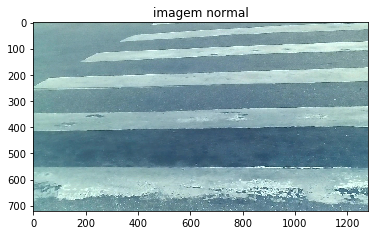

gray image shape: (720, 1280)


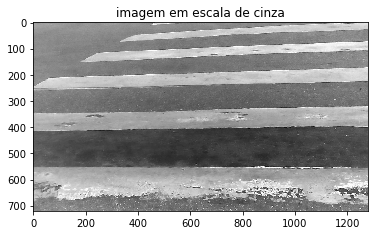

LBP image shape: (720, 1280)


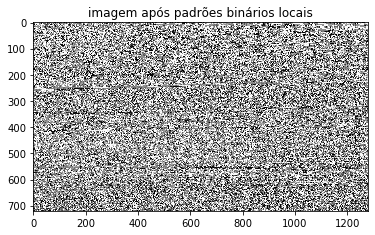

In [3]:
# Imagem normal
img = io.imread(example_path)
plt.imshow(img)
plt.title('imagem normal')
print(f'image shape: {img.shape}')
plt.show()

# Imagem em escala de cinza
img_gray = io.imread(example_path, as_gray=True)
plt.imshow(img_gray)
plt.title('imagem em escala de cinza')
plt.gray()
print(f'gray image shape: {img_gray.shape}')
plt.show()

# Parâmetros do LBP
METHOD = 'nri_uniform'
RADIUS = 1
N_POINTS = 8

# Imagem após LBP
img_lbp = local_binary_pattern(image=img_gray, P=N_POINTS, R=RADIUS, method=METHOD)
plt.imshow(img_lbp)
plt.title('imagem após padrões binários locais')
print(f'LBP image shape: {img_lbp.shape}')
plt.show()


0.0      36157
1.0      28257
2.0        980
3.0       9378
4.0        919
5.0      28547
6.0       1003
7.0       9649
8.0       1010
9.0       6691
10.0      6612
11.0      4610
12.0      4573
13.0      6627
14.0      6690
15.0      5042
16.0      5031
17.0     18646
18.0      4362
19.0     18653
20.0     10477
21.0     18157
22.0      4409
23.0     19709
24.0     11050
25.0     26956
26.0      7648
27.0      7800
28.0     30256
29.0     25530
30.0      7769
31.0      8052
32.0     31696
33.0     38636
34.0      9200
35.0     12955
36.0      9027
37.0     35376
38.0      8839
39.0     13440
40.0      9737
41.0      9859
42.0      9430
43.0     11116
44.0     11093
45.0      9198
46.0      9130
47.0     11103
48.0     11677
49.0      6582
50.0      6690
51.0      6380
52.0     21896
53.0      6033
54.0      6660
55.0      6141
56.0     21927
57.0     92947
58.0    113582
dtype: int64

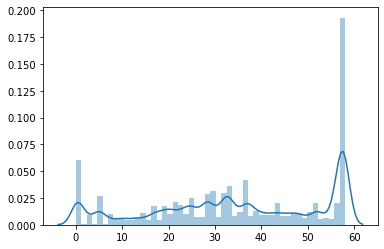

In [4]:
s = pd.Series(data=img_lbp.flatten())
sns.distplot(s)
counts = s.value_counts().sort_index()
counts

## Gerando csv de histogramas por amostra

In [6]:
amostra = []
for target_name in TARGET_NAMES:
    for path in path_dict[target_name]:
        img = io.imread(path, as_gray=True)
        lbp = local_binary_pattern(image=img, P=N_POINTS, R=RADIUS, method=METHOD).flatten()
        hist = pd.Series(lbp).value_counts().sort_index()
        arr = np.zeros(59)
        for i in hist.index:
            arr[int(i)] = hist[i]

        df = pd.DataFrame(data=[arr])
        df['target'] = TARGET_NAMES[target_name]
        amostra.append(df)

data = pd.concat(amostra, ignore_index=True)
data.to_csv('./csvs/lbp_faixas.csv')
data


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,target
0,36904.0,24474.0,1260.0,8560.0,1298.0,24922.0,1230.0,8441.0,1331.0,8388.0,...,6718.0,5014.0,20792.0,4781.0,6837.0,5231.0,21417.0,71844.0,101466.0,0
1,37345.0,30639.0,994.0,8445.0,979.0,31246.0,1012.0,8935.0,1026.0,7053.0,...,6600.0,5848.0,24977.0,5399.0,6266.0,5715.0,25243.0,91259.0,117105.0,0
2,38286.0,26974.0,1316.0,8297.0,1166.0,26997.0,1286.0,8289.0,1258.0,8839.0,...,6724.0,4807.0,23517.0,5062.0,6578.0,4952.0,23281.0,75694.0,105366.0,0
3,41626.0,28363.0,1300.0,9513.0,1296.0,28508.0,1339.0,9741.0,1320.0,8554.0,...,7785.0,5207.0,23895.0,5177.0,7546.0,5161.0,24198.0,81958.0,115721.0,0
4,28252.0,22035.0,654.0,10150.0,683.0,23023.0,658.0,10676.0,675.0,4925.0,...,6958.0,6911.0,15651.0,6462.0,6652.0,6779.0,16227.0,116961.0,102825.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,32787.0,25855.0,984.0,7643.0,793.0,26265.0,1078.0,8637.0,928.0,7203.0,...,5936.0,6021.0,20973.0,5059.0,5587.0,4884.0,20760.0,95737.0,101640.0,3
1496,32478.0,28584.0,847.0,6390.0,836.0,28346.0,881.0,7185.0,905.0,6272.0,...,5045.0,5655.0,23948.0,5157.0,4599.0,5195.0,23806.0,136678.0,102585.0,3
1497,31575.0,25945.0,709.0,8052.0,901.0,25753.0,788.0,9036.0,986.0,6764.0,...,6253.0,6247.0,20818.0,5114.0,5503.0,5575.0,20657.0,96914.0,103592.0,3
1498,39945.0,28140.0,1234.0,7558.0,1350.0,28063.0,1374.0,7778.0,1474.0,9189.0,...,6186.0,4994.0,24525.0,4704.0,6309.0,4985.0,24573.0,73606.0,105328.0,3


## Experimentando classificação com dados dos histogramas gerados

In [7]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

              precision    recall  f1-score   support

   nao_faixa       0.99      0.96      0.97       226
   tem_faixa       0.96      0.99      0.97       224

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



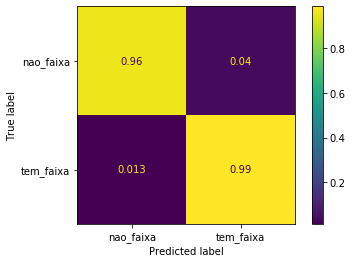

In [8]:
data = pd.read_csv('./csvs/lbp_faixas.csv')

y = np.array([0 if target == 0 else 1 for target in data.pop('target')])
X = data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = make_pipeline(StandardScaler(), SVC()).fit(X_train, y_train)
y_pred = clf.predict(X_test)

plot_confusion_matrix(
  estimator=clf,
  X=X_test,
  y_true=y_test,
  display_labels=['nao_faixa', 'tem_faixa'],
  normalize='true')

print(classification_report(y_true=y_test, y_pred=y_pred, target_names=['nao_faixa', 'tem_faixa']))